In [47]:
import pandas as pd
import numpy as np
import pandas_bokeh
import sys
sys.path.append('..')
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [48]:
hosp = pd.read_excel("../data/datos_hospitales.xlsx", sheet_name='Hospitales')
hosp['Nombre Servicio de Salud'] = hosp['Nombre Servicio de Salud'].str.strip()
hosp.head()


,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
0,Metropolitano Norte,Complejo Hospitalario San José,11,33,44,10,1407,47.2,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
1,Metropolitano Occidente,Hospital Adalberto Steeger (Talagante),6,11,17,5,1263,62.1,0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
2,Metropolitano Occidente,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
3,Metropolitano Occidente,Hospital San Juan de Dios,29,47,76,30,1066,39.2,0.482,0.554,0.564,0.331,0.438,0.509,0.544,0.410,0.441,0.359
4,Metropolitano Occidente,Instituto Traumatológico Dr. Teodoro Gebauer,12,6,18,5,1433,55.5,0.407,0.449,0.468,0.433,0.573,0.392,0.409,0.391,0.418,0.334


In [49]:
hist = pd.read_excel("../data/datos_hospitales.xlsx", sheet_name='Información Histórica')
hist.head()

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1,4,3
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1,5,4
2,3,Hospital Dr. Luis Tisné B.,GRD7,1,5,4
3,4,Hospital Dr. Exequiel González Cortés,GRD10,1,11,10
4,5,Hospital Barros Luco Trudeau,GRD6,1,6,5


In [50]:
grd = pd.read_excel("../data/datos_hospitales.xlsx", sheet_name='GRD')
grd.head()

,ID GRD,Nombre GRD,Costo resolución en Clínica Privada [MM$]
0,GRD1,Coronario,7.917
1,GRD2,Hepático,3.417
2,GRD3,Respiratorio,2.915
3,GRD4,Renal,6.188
4,GRD5,Neurológico,6.782


In [75]:
[True] * 2

[True, True]

In [116]:
def aplicar_condiciones(conditions: list) -> bool:
    if not conditions:
        return True
    return conditions[0] & aplicar_condiciones(conditions[1:])

def calcular_r2(y, yhat):
    """
    Calcula el coeficiente de determinación R².
    
    Parámetros:
    -----------
    x     : array-like, forma (n,)
            Variable independiente (no se usa en el cálculo, pero se incluye en la firma).
    y     : array-like, forma (n,)
            Valores observados de la variable dependiente.
    yhat  : array-like, forma (n,)
            Valores predichos de la variable dependiente.

    Retorna:
    --------
    r2 : float
         El coeficiente de determinación R².
    """
    y     = np.asarray(y,    dtype=float)
    yhat  = np.asarray(yhat, dtype=float)
    # Suma de cuadrados residuales
    ss_res = np.sum((y - yhat)**2)
    # Suma total de cuadrados (variación respecto a la media)
    ss_tot = np.sum((y - y.mean())**2)
    return 1 - ss_res/ss_tot

# EVALUACIÓN 4

In [127]:
hist['Hospital al que llega'].unique()

array(['Instituto Traumatológico Dr. Teodoro Gebauer',
       'Hospital Clínico San Borja-Arriarán',
       'Hospital Dr. Luis Tisné B.',
       'Hospital Dr. Exequiel González Cortés',
       'Hospital Barros Luco Trudeau',
       'Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica',
       'Hospital Dr. Félix Bulnes Cerda', 'Hospital Del Salvador',
       'Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río',
       'Complejo Hospitalario San José',
       'Complejo Hospitalario Dr. Sótero del Río\xa0\xa0',
       'Hospital El Pino', 'Hospital el Carmen',
       'Hospital San Juan de Dios',
       'Hospital Adalberto Steeger (Talagante)',
       'Instituto de Neurocirugía Dr. Alfonso Asenjo',
       'Hospital Parroquial de San Bernardo\xa0\xa0\xa0\xa0\xa0\xa0',
       'Hospital Clínico de la Florida',
       'Hospital Padre Alberto Hurtado (San Ramón)',
       'Hospital de Enfermedades Infecciosas Dr. Lucio Córdova',
       'Hospital Metropolitano ( ex Mili

In [129]:
[60+10*x for x in [11.6, 10.2, 8.8]]

[176.0, 162.0, 148.0]

Llegarán 7 pacientes.


Día de llegada
420    14.4
421    13.0
422    11.6
423    10.2
424     8.8
Name: Día de llegada, dtype: float64

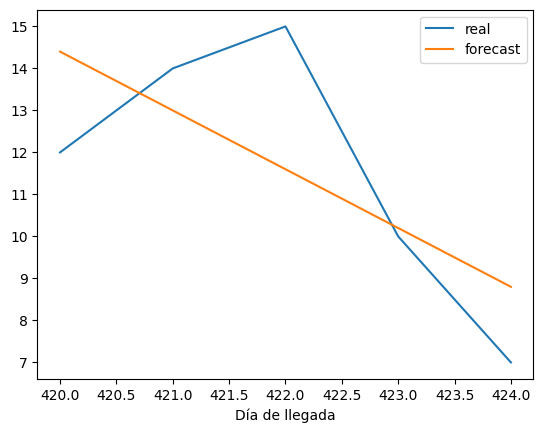

In [ ]:
#serie.sum() - sum([156, 123, 178, 200, 155])

[60+10*x for x in [11.6, 10.2, 8.8]]

dia = 425
grado = 1
nmovil = 5
condiciones = [
#hist['GRD'] == 'GRD9',
hist['Hospital al que llega'] == 'Complejo Hospitalario San José'
]
serie = hist[aplicar_condiciones(condiciones)].sort_values(by='Día de llegada').groupby('Día de llegada')['Número de llegada'].count().tail(nmovil)
#for idx in [423, 424]:
#    serie.loc[idx] = 0
m, b = np.polyfit(serie.index, serie, grado)
print('Llegarán', round(m*dia + b), 'pacientes.')
ax1 = serie.plot()
prediccion = pd.Series(serie.index).map(lambda x: m*x + b)
prediccion.index = serie.index
ax2 = prediccion.plot()
ax1.legend(['real', 'forecast'])
prediccion

Llegarán 88.0 pacientes.
m= -20.199999999999143 b= 8672.999999999636 R2= 0.6840340642392516


Día de llegada
420    183
421    159
422    160
423    159
424     82
Name: Número de llegada, dtype: int64

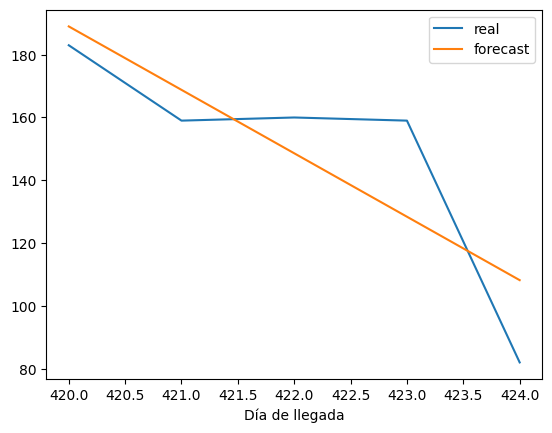

In [126]:
dia = 425
grado = 1
nmovil = 5
serie = hist.sort_values(by='Día de llegada').groupby('Día de llegada')['Número de llegada'].count().tail(nmovil)
#for idx in [423, 424]:
#    serie.loc[idx] = 0
m, b = np.polyfit(serie.index, serie, grado)
print('Llegarán', np.ceil(m*dia + b), 'pacientes.')
ax1 = serie.plot()
prediccion = pd.Series(serie.index).map(lambda x: m*x + b)
prediccion.index = serie.index
ax2 = prediccion.plot()
ax1.legend(['real', 'forecast'])
prediccion
r2 = calcular_r2(serie, prediccion)
print('m=', m, 'b=', b, 'R2=', r2)
serie


Llegarán 6 pacientes.


Día de llegada
420    15.6
421    13.7
422    11.8
423     9.9
424     8.0
Name: Día de llegada, dtype: float64

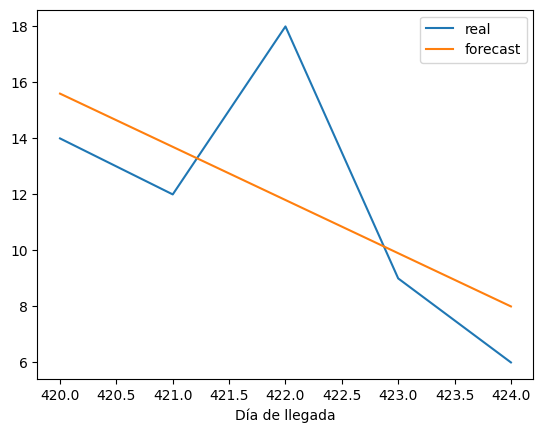

In [ ]:
dia = 425
grado = 1
nmovil = 5
condiciones = [
#hist['GRD'] == 'GRD9',
hist['Hospital al que llega'] == 'Hospital Del Salvador'
]
serie = hist[aplicar_condiciones(condiciones)].sort_values(by='Día de llegada').groupby('Día de llegada')['Número de llegada'].count().tail(nmovil)
#for idx in [423, 424]:
#    serie.loc[idx] = 0
m, b = np.polyfit(serie.index, serie, grado)
print('Llegarán', round(m*dia + b), 'pacientes.')
ax1 = serie.plot()
prediccion = pd.Series(serie.index).map(lambda x: m*x + b)
prediccion.index = serie.index
ax2 = prediccion.plot()
ax1.legend(['real', 'forecast'])
prediccion


Llegarán -0.0 pacientes.


Día de llegada
420    3.4
421    2.6
422    1.8
423    1.0
424    0.2
Name: Día de llegada, dtype: float64

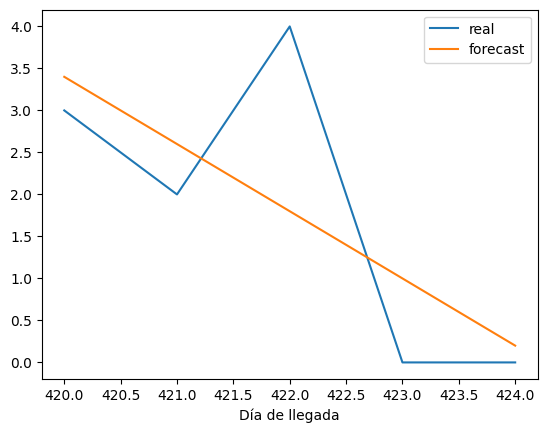

In [130]:
dia = 425
grado = 1
nmovil = 3
condiciones = [
hist['GRD'] == 'GRD9',
hist['Hospital al que llega'] == 'Hospital Del Salvador'
]
serie = hist[aplicar_condiciones(condiciones)].sort_values(by='Día de llegada').groupby('Día de llegada')['Número de llegada'].count().tail(nmovil)
for idx in [423, 424]:
    serie.loc[idx] = 0
m, b = np.polyfit(serie.index, serie, grado)
print('Llegarán', np.ceil(m*dia + b), 'pacientes.')
ax1 = serie.plot()
prediccion = pd.Series(serie.index).map(lambda x: m*x + b)
prediccion.index = serie.index
ax2 = prediccion.plot()
ax1.legend(['real', 'forecast'])
prediccion


In [135]:
nmovil = 5
condiciones = [
hist['GRD'] == 'GRD9',
hist['Hospital al que llega'] == 'Hospital Del Salvador'
]
serie = hist[aplicar_condiciones(condiciones)].groupby('Día de llegada')['Número de llegada'].count().tail(nmovil)
serie = serie[serie.index.isin([420, 421, 422, 423, 424])]
serie.loc[423] = 0
serie.loc[424] = 0
print('Llegarán', np.ceil(serie.mean()), 'pacientes.')
serie

Llegarán 2.0 pacientes.


Día de llegada
420    3
421    2
422    4
423    0
424    0
Name: Número de llegada, dtype: int64

# EVALUACIÓN 3

In [46]:
hist.head()

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1,4,3
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1,5,4
2,3,Hospital Dr. Luis Tisné B.,GRD7,1,5,4
3,4,Hospital Dr. Exequiel González Cortés,GRD10,1,11,10
4,5,Hospital Barros Luco Trudeau,GRD6,1,6,5


<Axes: xlabel='Nombre Servicio de Salud'>

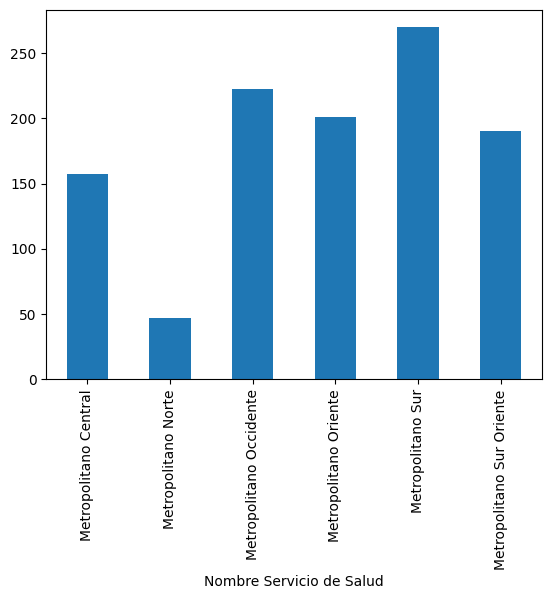

In [43]:
hosp.groupby('Nombre Servicio de Salud')['Costo de operación anual de una cama [MM$]'].sum().plot(kind='bar')

<Axes: xlabel='GRD'>

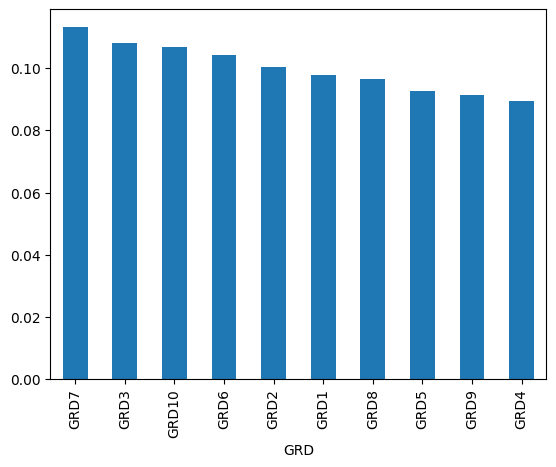

In [38]:
cota = hist['Día de llegada'].max() - 10
serie = hist.loc[hist['Día de llegada'] > cota, 'GRD']
serie.value_counts(normalize=True, sort=True).plot(kind='bar')

In [29]:
cota = hist['Día de llegada'].max() - 11
serie = hist.loc[hist['Día de llegada'] > cota, ['Número de llegada', 'GRD']].groupby('GRD').count()
(serie/serie.sum()).max()

Número de llegada    0.112808
dtype: float64

In [15]:
#Pregunta 6
#Al hacer una tabla de frecuencia sobre la cantidad total de camas críticas en los
#  hospitales de la red, considerando intervalos de 3 en 3, ¿en cuántos intervalos hay exactamente un hospital?  
serie = hosp['Total Camas Críticas']
n = 3
xmin = serie.min()
xmax = serie.max()
intervalos = np.arange(xmin, xmax + n, n)
serie.value_counts(bins=intervalos).reset_index().groupby('count').count()

,index
count,
0,13
1,6
3,2
4,1
5,1


<Axes: xlabel='Día de llegada'>

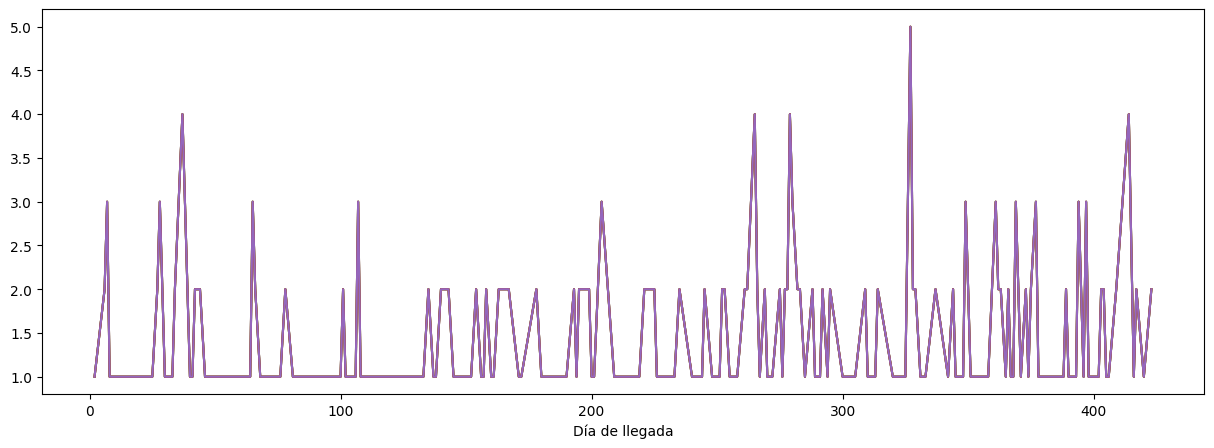

In [ ]:
#Pregunta 1
#¿Cuál código permite hacer un gráfico de línea de las llegadas históricas del GRD4 en el hospital San Juan de Dios?  
acondiciones = [
    hist['Hospital al que llega'] == 'Hospital San Juan de Dios',
    hist['GRD'] == 'GRD4',
]
hist[aplicar_condiciones(condiciones)].groupby('Día de llegada').count().plot(kind='line', legend=None, figsize=(15, 5))

<Axes: xlabel='Día de llegada'>

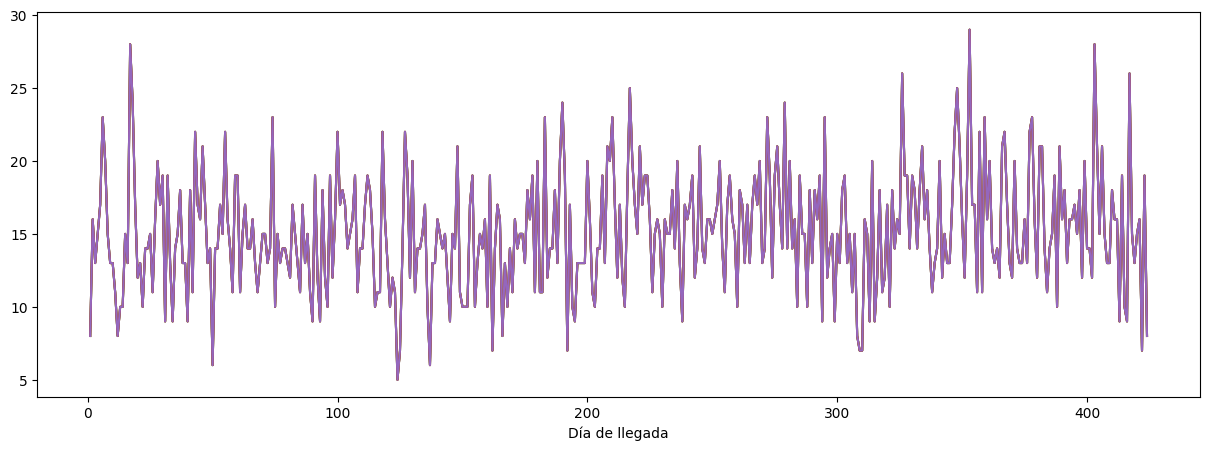

In [33]:
# Pregunta 2
# ¿Cuál de las siguientes alternativas corresponde al código que permite construir un gráfico de línea con las 
# llegadas históricas por día para el GRD4? (y entonces, agrupando cada día las llegadas a todos los hospitales)
condiciones = [
    hist['GRD'] == 'GRD4',
]
hist[aplicar_condiciones(condiciones)].groupby('Día de llegada').count().plot(kind='line', legend=None, figsize=(15, 5))

<Axes: >

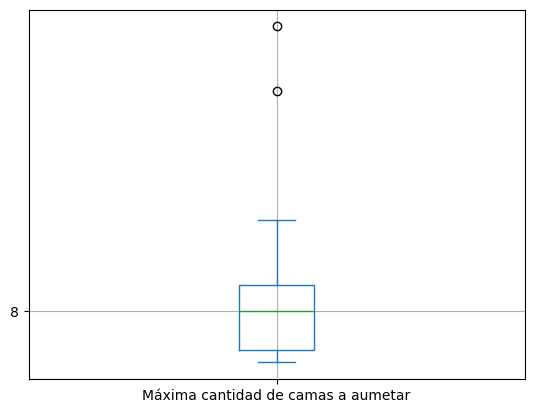

In [48]:
hosp['Máxima cantidad de camas a aumetar'].plot(kind='box', grid=True, yticks=(8,))

# EVALUACIÓN 2

In [131]:
merge = hist.merge(
        hosp[['Nombre Servicio de Salud', 'Nombre Establecimiento', 'Costo diario GRD1 [MM$]']],
        how='left',
        left_on= 'Hospital al que llega',
        right_on='Nombre Establecimiento')
merge['Nombre Servicio de Salud'] = merge['Nombre Servicio de Salud'].str.strip()

columnas = hosp.columns[hosp.columns.str.startswith('Costo diario GRD')]
hosp_reshape = hosp.melt(id_vars=['Nombre Servicio de Salud', 'Nombre Establecimiento'], value_name='Costo Diario GRD [MM$]', value_vars=columnas, var_name='GRD')
hosp_reshape['GRD'] = hosp_reshape['GRD'].map(lambda x: x.split()[2])
hosp_reshape

,Nombre Servicio de Salud,Nombre Establecimiento,GRD,Costo Diario GRD [MM$]
0,Metropolitano Norte ...,Complejo Hospitalario San José,GRD1,0.593
1,Metropolitano Occidente ...,Hospital Adalberto Steeger (Talagante),GRD1,0.493
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,GRD1,0.580
3,Metropolitano Occidente ...,Hospital San Juan de Dios,GRD1,0.482
4,Metropolitano Occidente ...,Instituto Traumatológico Dr. Teodoro Gebauer,GRD1,0.407
...,...,...,...,...
205,Metropolitano Sur ...,Hospital Parroquial de San Bernardo,GRD10,0.310
206,Metropolitano Sur Oriente ...,Complejo Hospitalario Dr. Sótero del Río,GRD10,0.403
207,Metropolitano Sur Oriente ...,Hospital Clínico de la Florida,GRD10,0.505
208,Metropolitano Sur Oriente ...,Hospital Metropolitano ( ex Militar ),GRD10,0.563


In [193]:
# Pregunta 9
aux = hosp.groupby('Nombre Servicio de Salud')['Costo de instalar una cama [MM$]'].min()
(
    hosp[['Nombre Servicio de Salud', 'Máxima cantidad de camas a aumetar', 'Costo de instalar una cama [MM$]']]
    .merge(aux, how='inner', on=['Nombre Servicio de Salud', 'Costo de instalar una cama [MM$]'])
    .assign(costo = lambda x: x['Costo de instalar una cama [MM$]']*8)
)

,Nombre Servicio de Salud,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],costo
0,Metropolitano Norte ...,10,1407,11256
1,Metropolitano Occidente ...,30,1066,8528
2,Metropolitano Central ...,10,1256,10048
3,Metropolitano Oriente ...,8,1056,8448
4,Metropolitano Sur ...,4,1051,8408
5,Metropolitano Sur Oriente ...,5,1028,8224


In [198]:
1028*5 + 1093*3

8419

In [197]:
condiciones = hosp['Nombre Servicio de Salud'] == 'Metropolitano Sur Oriente'
hosp[condiciones]

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
17,Metropolitano Sur Oriente,Complejo Hospitalario Dr. Sótero del Río,20,35,55,12,1203,40.6,0.560,0.388,0.584,0.458,0.451,0.595,0.336,0.525,0.472,0.403
18,Metropolitano Sur Oriente,Hospital Clínico de la Florida,9,15,24,5,1028,60.0,0.527,0.552,0.431,0.594,0.331,0.341,0.580,0.528,0.537,0.505
19,Metropolitano Sur Oriente,Hospital Metropolitano ( ex Militar ),12,20,32,5,1093,46.3,0.549,0.553,0.471,0.346,0.582,0.331,0.456,0.394,0.410,0.563
20,Metropolitano Sur Oriente,Hospital Padre Alberto Hurtado (San Ramón),6,10,16,5,1166,43.2,0.479,0.579,0.387,0.509,0.571,0.516,0.584,0.382,0.462,0.424


In [185]:
# Pregunta 6 y 7 y 8
grd_mean = hosp_reshape.groupby('Nombre Servicio de Salud')['Costo Diario GRD [MM$]'].mean()
grd_mean.index = grd_mean.index.str.strip()


condiciones = (
    (merge['Día de llegada'] >= 415) 
)

res = (
    merge[condiciones][['Nombre Servicio de Salud', 'Nombre Establecimiento', 'Estadia']]
    .merge(grd_mean.reset_index(), how='left', on=['Nombre Servicio de Salud'])
    .assign(costo = lambda x: x['Estadia']*x['Costo Diario GRD [MM$]'])
    .groupby('Nombre Servicio de Salud')['costo'].sum()
    .sort_values(ascending=False)
    )

print(res.max() - res.min())

res

609.8559250000001


Nombre Servicio de Salud
Metropolitano Oriente        901.242925
Metropolitano Sur            801.485360
Metropolitano Central        662.148300
Metropolitano Occidente      605.951250
Metropolitano Sur Oriente    592.295650
Metropolitano Norte          291.387000
Name: costo, dtype: float64

In [ ]:
# Pregunta 5
condiciones = (
    (merge['Nombre Establecimiento'] == 'Hospital el Carmen')
    & (merge['Día de llegada'] >= 415) 
)

(
    merge[condiciones][['GRD', 'Estadia', 'Nombre Establecimiento']]
    .merge(hosp_reshape, how='left', on=['Nombre Establecimiento', 'GRD'])
    .assign(costo = lambda x: x['Estadia']*x['Costo Diario GRD [MM$]'])['costo'].sum()
)

np.float64(77.776)

In [112]:
# Pregunta 4
condiciones = (
    (merge['Nombre Establecimiento'] == 'Hospital el Carmen')
    & (merge['Día de llegada'] >= 415) 
    & (merge['GRD'] == 'GRD1')
)

(
    merge[condiciones].assign(costo = lambda x: x['Estadia']*x['Costo diario GRD1 [MM$]'])['costo'].sum()
)

np.float64(8.88)

In [102]:
# Pregunta 3
lista = ['Metropolitano Central', 'Metropolitano Norte', 'Metropolitano Occidente', 'Metropolitano Oriente', 'Metropolitano Sur', 'Metropolitano Sur Oriente']
(
    merge
    .groupby(['Nombre Servicio de Salud', 'Nombre Establecimiento'])
    .count().reset_index()
    .groupby('Nombre Servicio de Salud')['Número de llegada']
    .describe()['50%']
)

Nombre Servicio de Salud
Metropolitano Central        4688.0
Metropolitano Norte          4652.0
Metropolitano Occidente      3265.5
Metropolitano Oriente        4050.0
Metropolitano Sur            1611.0
Metropolitano Sur Oriente    1608.0
Name: 50%, dtype: float64

In [93]:
#Pregunta 2
(
    merge[(merge['GRD'].isin(['GRD1', 'GRD7', 'GRD10'])) & (merge['Nombre Servicio de Salud'] == 'Metropolitano Sur')]
    .groupby(['Nombre Servicio de Salud', 'GRD']).count().sort_values(by='GRD')
)

Número de llegada  Hospital al que llega  \
Nombre Servicio de Salud GRD                                               
Metropolitano Sur        GRD1                1311                   1311   
                         GRD10               1269                   1269   
                         GRD7                1293                   1293   

                                Día de llegada  Día de salida  Estadia  \
Nombre Servicio de Salud GRD                                             
Metropolitano Sur        GRD1             1311           1311     1311   
                         GRD10            1269           1269     1269   
                         GRD7             1293           1293     1293   

                                Nombre Establecimiento  
Nombre Servicio de Salud GRD                            
Metropolitano Sur        GRD1                     1311  
                         GRD10                    1269  
                         GRD7                     1293

In [ ]:
# Pregunta 1
(
    hist[hist['Día de llegada'] == 1]
    .merge(
        hosp[['Nombre Servicio de Salud', 'Nombre Establecimiento']],
        how='left',
        left_on= 'Hospital al que llega',
        right_on='Nombre Establecimiento')
    .groupby(['Nombre Servicio de Salud']).count()
    .sort_values(by='Número de llegada', ascending=False)
)

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia,Nombre Establecimiento
Nombre Servicio de Salud,,,,,,,
Metropolitano Oriente,36,36,36,36,36,36,36
Metropolitano Occidente,29,29,29,29,29,29,29
Metropolitano Sur,26,26,26,26,26,26,26
Metropolitano Central,25,25,25,25,25,25,25
Metropolitano Norte,16,16,16,16,16,16,16
Metropolitano Sur Oriente,14,14,14,14,14,14,14


# EVALUACIÓN 1

In [70]:
# Pregunta 10
hosp[['Nombre Servicio de Salud', 'Costo de instalar una cama [MM$]']].groupby('Nombre Servicio de Salud').min()


,Costo de instalar una cama [MM$]
Nombre Servicio de Salud,
Metropolitano Central,1256
Metropolitano Norte,1407
Metropolitano Occidente,1066
Metropolitano Oriente,1056
Metropolitano Sur,1051
Metropolitano Sur Oriente,1028


In [68]:
# Pregunta 8
hist.groupby('Día de llegada').count()['Número de llegada'].max()

np.int64(183)

In [64]:
# Pregunta 7
print(hosp['Costo de operación anual de una cama [MM$]'].max()-hosp['Costo de operación anual de una cama [MM$]'].min())

29.499999999999993


In [61]:
# Pregunta 6
hist[hist['Día de llegada']>=415].groupby('GRD').mean(numeric_only=True)

,Número de llegada,Día de llegada,Día de salida,Estadia
GRD,,,,
GRD1,64856.178808,419.874172,429.874172,10.0
GRD10,64812.290909,419.557576,429.557576,10.0
GRD2,64710.425806,419.006452,423.006452,4.0
GRD3,64709.131737,418.946108,421.946108,3.0
GRD4,64775.471014,419.362319,425.362319,6.0
GRD5,64819.895105,419.671329,423.671329,4.0
GRD6,64737.105590,419.136646,424.136646,5.0
GRD7,64746.628571,419.194286,423.194286,4.0
GRD8,64735.516779,419.147651,423.147651,4.0


In [ ]:
# Pregunta 5
grd['Costo resolución en Clínica Privada [MM$]'].sort_values(ascending=False)[0:3].mean()


np.float64(7.538333333333334)

In [36]:
# Pregunta 4
f'''Promedio diario de pacientes de los últimos 10 días: {hist[hist['Día de llegada'].map(lambda x: 415 <= x <= 424)].groupby('Día de llegada').count().reset_index()['Número de llegada'].mean():.0f}'''

'Promedio diario de pacientes de los últimos 10 días: 154'

In [25]:
# Pregunta 3
f''' Costo promedio diario GRD4 = {hosp['Costo diario GRD4 [MM$]'].mean():.3f}'''

' Costo promedio diario GRD4 = 0.448'

In [ ]:
# Pregunta 1 y 2
hosp[['Nombre Servicio de Salud', 'Total Camas Críticas']].groupby('Nombre Servicio de Salud').sum().sort_values(by='Total Camas Críticas', ascending=False)

,Total Camas Críticas
Nombre Servicio de Salud,
Metropolitano Sur,173
Metropolitano Oriente,137
Metropolitano Sur Oriente,127
Metropolitano Occidente,120
Metropolitano Central,105
Metropolitano Norte,44
